# Advanced Image Classification: From Basic CNN to VGG16

## Project Description:
The realm of image classification, a subset of computer vision, has witnessed revolutionary changes with the advent of Deep Learning. Traditional machine learning techniques were often insufficient when dealing with high dimensional and large-scale image datasets. Enter Convolutional Neural Networks (CNNs) — the linchpin in state-of-the-art image classification.

In this project, our exploration is twofold:
1. **Basic CNN Architecture**: We start with a simple convolutional neural network, aiming to set a foundational accuracy benchmark.
2. **VGG16 - Transfer Learning**: Given the success of the VGG16 model in the ImageNet Large Scale Visual Recognition Challenge, we employ this pre-trained model, customizing its final layers to suit our specific classification task. This strategy is known as transfer learning, where knowledge from a pre-trained model is transferred to a new, similar task.

### Dataset Overview:
The dataset revolves around the beautiful world of butterflies, encompassing:

- **75 Distinct Classes**: The dataset showcases a diverse variety of butterflies.
- **Total Images**: 1000+ labeled images that include both training and validation sets.
- **Labeling Scheme**: Each image is meticulously labeled, belonging to a single butterfly category. The `Training_set.csv` file holds the labels for each image.
- **Testing Set**: `Testing_set.csv` enlists the names of images in the test folder. The objective is to predict the butterfly category for these test images, as part of the "Data Sprint 107 - Butterfly Image Classification" challenge.
Every image in the dataset has been resized to 128x128 pixels. Data augmentation techniques, like rescaling, have been applied to the training data to artificially expand the dataset and potentially improve model generalization.

## Process Flow:
1. **Data Loading & Augmentation**: Using `ImageDataGenerator` from TensorFlow, we preprocess images by rescaling and split the training data for validation purposes.
2. **Model Building**:
    - Design a basic CNN architecture.
    - Implement a more sophisticated model using VGG16 as the base.
3. **Training & Validation**: Both models are trained on the training set and validated using the validation subset.
4. **Performance Evaluation**: Accuracies of both models are gauged on the validation set.

## Results:
- **Original CNN Model Accuracy**: 57.66%%
- **Advanced VGG16 Model Accuracy**: 72.52%%






## 1. Import necessary libraries ##

In [9]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, GlobalAveragePooling2D, Dense
import matplotlib.pyplot as plt

## 2. Data Loading and Preprocessing

### Dataset Structure:
The dataset, dedicated to butterfly images, consists of two primary files:
1. `Training_set.csv`: Holds the labels corresponding to each image.
2. `Testing_set.csv`: Enlists the images meant for testing.

The images, originally of varying resolutions, have been resized to a consistent dimension of 128x128 pixels. 

### Preprocessing:
TensorFlow's `ImageDataGenerator` is the linchpin here. It doesn't just facilitate easy data loading, but is instrumental in performing critical augmentations like rescaling. This augmentation serves two pivotal purposes:
1. Models generally perform better when the pixel values are in the range [0,1]. 
2. To counteract overfitting and to introduce variability in the training dataset, ensuring that the model is more robust and generalizes well to new data. 

The data has been split with 80% dedicated to training and the remaining 20% to validation.


In [2]:
# Load CSVs
train_df = pd.read_csv('datasets/Training_set.csv')
test_df = pd.read_csv('datasets/Testing_set.csv')

In [3]:

# ImageDataGenerator for image augmentation
datagen = ImageDataGenerator(rescale=1./255., validation_split=0.2)

train_generator = datagen.flow_from_dataframe(
    train_df,
    directory='datasets/train/',
    x_col="filename",
    y_col="label",
    subset="training",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(128,128)
)

valid_generator = datagen.flow_from_dataframe(
    train_df,
    directory='datasets/train/',
    x_col="filename",
    y_col="label",
    subset="validation",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(128,128)
)



Found 5200 validated image filenames belonging to 75 classes.
Found 1299 validated image filenames belonging to 75 classes.


## 3. Construct and Train the Original Model

### The Original CNN Model:
The first model constructed is a straightforward Convolutional Neural Network (CNN). It is layered as follows:
1. **Convolutional Layers**: Designed to detect patterns and features in images. We begin with 32 filters, progressing to 64 and then 128.
2. **Pooling Layers**: Aid in reducing the spatial size and complexity of the representation, making computations more manageable.
3. **Dense Layers**: Fully connected layers aimed at classifying the detected features into respective classes.

The choice of `ReLU` (Rectified Linear Unit) as the activation function for the convolutional and dense layers aids in introducing non-linearity to the model. The final layer employs the `Softmax` function, given the multi-class nature of the problem, distributing probabilities across the 75 butterfly classes.

### Training:
The model is trained using the `Adam` optimizer. It's a popular choice due to its efficiency and low memory requirement. Categorical Cross-Entropy is used as the loss function, apt for multi-class classification tasks. The training process keeps a vigilant eye on the accuracy metric.

While the model's architecture might seem simplistic, especially in the realm of deep learning, it sets a pivotal benchmark for comparison with more sophisticated models.

In [4]:
# 2. Original Model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(75, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_original = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    verbose=1
)

Epoch 1/10
163/163 [==============================] - 28s 168ms/step - loss: 3.1595 - accuracy: 0.2165 - val_loss: 2.1924 - val_accuracy: 0.4242
Epoch 2/10
163/163 [==============================] - 30s 183ms/step - loss: 1.5348 - accuracy: 0.5763 - val_loss: 1.6524 - val_accuracy: 0.5473
Epoch 3/10
163/163 [==============================] - 31s 189ms/step - loss: 0.7116 - accuracy: 0.7852 - val_loss: 1.7077 - val_accuracy: 0.5643
Epoch 4/10
163/163 [==============================] - 31s 191ms/step - loss: 0.2532 - accuracy: 0.9237 - val_loss: 2.0887 - val_accuracy: 0.5612
Epoch 5/10
163/163 [==============================] - 31s 191ms/step - loss: 0.1118 - accuracy: 0.9719 - val_loss: 2.2309 - val_accuracy: 0.6066
Epoch 6/10
163/163 [==============================] - 31s 192ms/step - loss: 0.0626 - accuracy: 0.9831 - val_loss: 2.1716 - val_accuracy: 0.5989
Epoch 7/10
163/163 [==============================] - 31s 191ms/step - loss: 0.0525 - accuracy: 0.9869 - val_loss: 2.3906 - val_ac

## 4. Construct and Train the Advanced VGG16 Model

### VGG16 - A Bit of History:
VGG16 is a convolutional neural network model, propounded by the Visual Geometry Group from the University of Oxford, hence the acronym VGG. VGG16 refers to the variant with 16 weight layers. Known for its simplicity and being highly effective, it's one of the most preferred choices for feature extraction from images.

### Integrating VGG16:
In our context, the VGG16 model is incorporated as the base, with weights pre-trained on the ImageNet dataset. This is a classic example of transfer learning, where the model, already trained on a massive dataset, is leveraged to extract features from our butterfly images. Such a methodology helps in two pivotal ways:
1. Speeds up the convergence.
2. Requires fewer data for decent performance, since the network already understands basic to intricate image features.

However, since VGG16 was originally trained for 1000 classes (from ImageNet), we exclude its top (or classification part). We then add our layers, tailored for our 75 classes of butterflies:
1. **GlobalAveragePooling2D Layer**: Reduces spatial dimensions.
2. **Dense Layer**: 512 neurons with `ReLU` activation for non-linearity.
3. **Dropout Layer**: Helps in regularization, reducing potential overfitting.
4. **Final Dense Layer**: With 75 neurons (for each butterfly class) and `Softmax` activation for probability distribution.

### Training:
Much like the original model, the VGG16-based model uses the `Adam` optimizer and Categorical Cross-Entropy as the loss function. Yet, owing to the depth and sophistication of VGG16, expect enhanced performance, especially with feature extraction and generalization.

In [5]:
# 3. Advanced Model

# VGG16 as base model
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(128, 128, 3)))
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(75, activation='softmax')(x)

advanced_model = Model(inputs=base_model.input, outputs=predictions)

advanced_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_advanced = advanced_model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    verbose=1
)



Epoch 1/10
163/163 [==============================] - 230s 1s/step - loss: 3.9341 - accuracy: 0.1213 - val_loss: 3.2247 - val_accuracy: 0.3356
Epoch 2/10
163/163 [==============================] - 241s 1s/step - loss: 2.8090 - accuracy: 0.3325 - val_loss: 2.2494 - val_accuracy: 0.5242
Epoch 3/10
163/163 [==============================] - 249s 2s/step - loss: 2.1362 - accuracy: 0.4725 - val_loss: 1.7754 - val_accuracy: 0.6189
Epoch 4/10
163/163 [==============================] - 242s 1s/step - loss: 1.7794 - accuracy: 0.5410 - val_loss: 1.5292 - val_accuracy: 0.6382
Epoch 5/10
163/163 [==============================] - 247s 2s/step - loss: 1.5457 - accuracy: 0.5881 - val_loss: 1.3636 - val_accuracy: 0.6628
Epoch 6/10
163/163 [==============================] - 252s 2s/step - loss: 1.3850 - accuracy: 0.6315 - val_loss: 1.2570 - val_accuracy: 0.6821
Epoch 7/10
163/163 [==============================] - 253s 2s/step - loss: 1.2621 - accuracy: 0.6571 - val_loss: 1.2173 - val_accuracy: 0.6875

## 5. Compare Model Performances and Visualization

### Direct Comparison:
Once both the original and advanced models are trained, their validation accuracies are juxtaposed. This direct metric comparison provides immediate insight into which model has fared better on unseen data.

### Visualization:
Visualization is a quintessential part of any deep learning project. It's not just about numbers; visual cues help in grasping the trajectory of training and validation processes.

- **Loss Curves**: By plotting the training and validation loss against epochs, we can discern the dynamics of learning. Diverging curves might indicate overfitting.
- **Accuracy Curves**: Analogous to loss curves, they depict the evolution of accuracy over epochs. A plateau might signify the need for a learning rate adjustment or more sophisticated training strategies.

These plots help in understanding:
1. If the models are learning well.
2. If they're overfitting.
3. The epoch where the best validation score was achieved.

Armed with these visuals, making decisions becomes more informed, whether it's about further training, tweaking hyperparameters, or even changing the model's architecture.

In [6]:
# 4. Accuracy Comparison on Validation Set

_, accuracy_original = model.evaluate(valid_generator)
_, accuracy_advanced = advanced_model.evaluate(valid_generator)

print(f"Original Model Accuracy: {accuracy_original * 100:.2f}%")
print(f"Advanced Model Accuracy: {accuracy_advanced * 100:.2f}%")

41/41 [==============================] - 45s 1s/step - loss: 1.0373 - accuracy: 0.7252
Original Model Accuracy: 57.66%
Advanced Model Accuracy: 72.52%


Text(0.5, 0, 'Epoch')

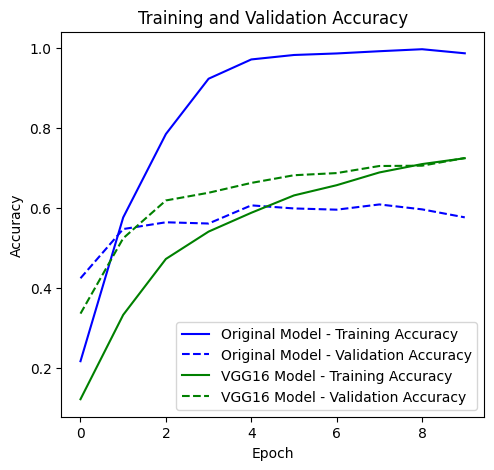

In [10]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_original.history['accuracy'], label='Original Model - Training Accuracy', color='blue')
plt.plot(history_original.history['val_accuracy'], label='Original Model - Validation Accuracy', color='blue', linestyle='dashed')
plt.plot(history_advanced.history['accuracy'], label='VGG16 Model - Training Accuracy', color='green')
plt.plot(history_advanced.history['val_accuracy'], label='VGG16 Model - Validation Accuracy', color='green', linestyle='dashed')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

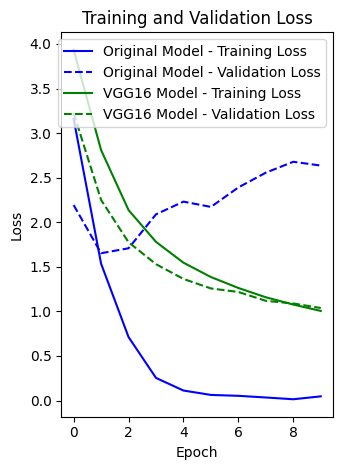

In [11]:
# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history_original.history['loss'], label='Original Model - Training Loss', color='blue')
plt.plot(history_original.history['val_loss'], label='Original Model - Validation Loss', color='blue', linestyle='dashed')
plt.plot(history_advanced.history['loss'], label='VGG16 Model - Training Loss', color='green')
plt.plot(history_advanced.history['val_loss'], label='VGG16 Model - Validation Loss', color='green', linestyle='dashed')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()